In [1]:
###  Heart disease prediction using ML(Logistic Regression ,KNN ,Naïve Bayes, Decision Tree, SVM, Random Forest, Gradient Boosting) on single data set to get the best possible accuracy and comparing all.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#age
#sex : 1=,male 0=female
#chest pain type (4 values)
#resting blood pressure
#serum cholestoral in mg/dl
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2)
#maximum heart rate achieved
#exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest
#the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy
#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [4]:
heart_df=pd.read_csv("C:\\Users\\Prema\\Downloads\\archive (15).zip")

In [5]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_df['sex'].replace(0, 'Female',inplace=True)
heart_df['sex'].replace(1, 'Male',inplace=True)

In [7]:
heart_df.shape

(1025, 14)

In [8]:
heart_df.size

14350

In [9]:
heart_df.info()  #### d types in int and flat no object d type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [10]:
heart_df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
heart_df.isnull().sum()   ### No null valuesss present

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
heart_df.duplicated().sum()

723

In [13]:
for i in heart_df.columns:
    print(f"{i}: {heart_df[i].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [14]:
## From above we concluded that sex,cp,fbs,restecg,slope,ca,thal,target are categorical columns

categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']
for i in categoricas:
    heart_df[i]= heart_df[i].astype('object')


In [15]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


In [16]:
categorical_col=[i for i in heart_df.columns if heart_df[i].dtype=='O']
Numerical_col=[i for i in heart_df.columns if heart_df[i].dtype!='O']

In [17]:
print('categorical columns are :',categorical_col,'\n','Numerical columns are :',Numerical_col)

categorical columns are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'] 
 Numerical columns are : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


<AxesSubplot:>

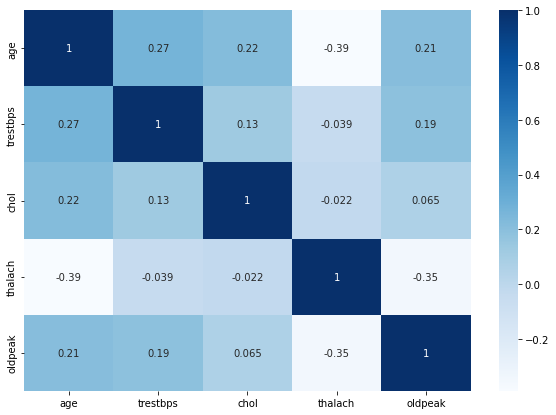

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(heart_df.corr(), annot = True, cmap = 'Blues')

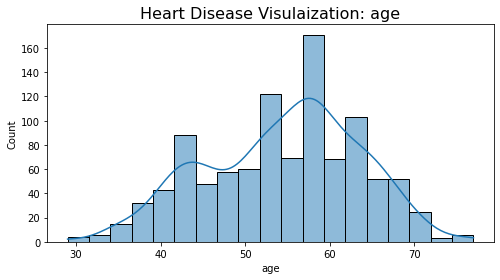

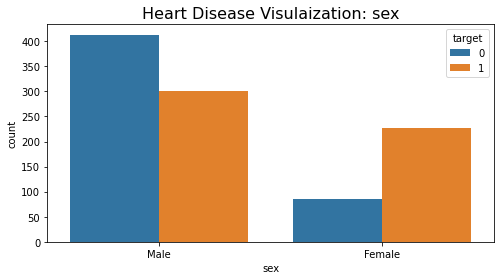

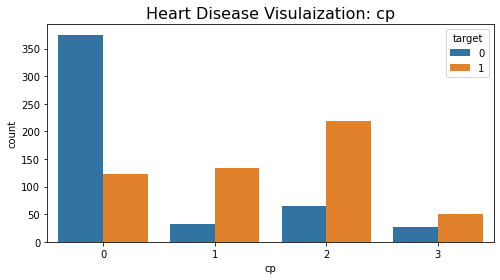

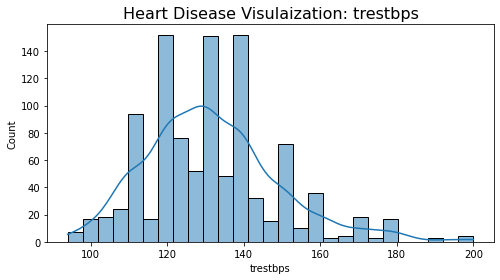

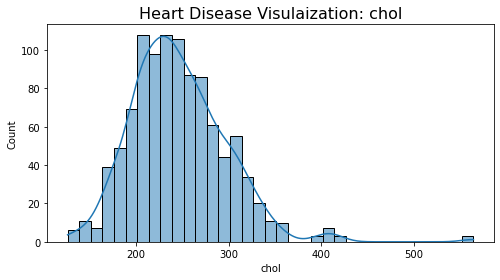

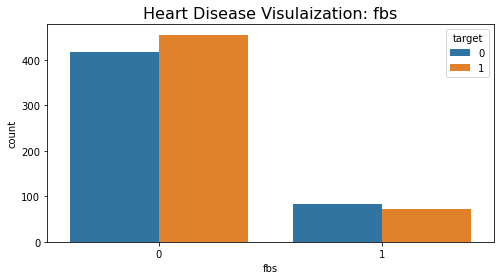

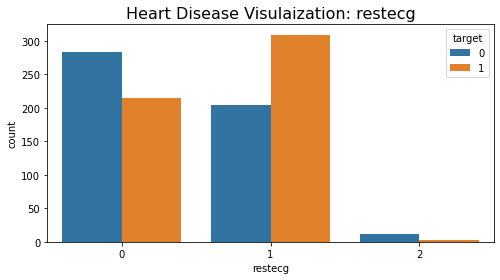

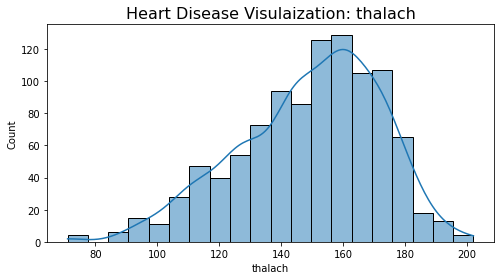

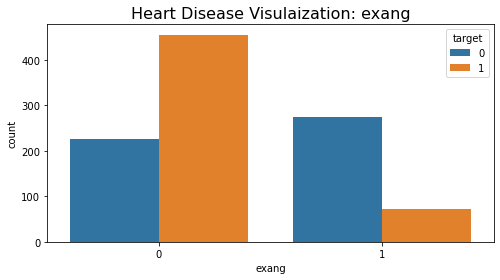

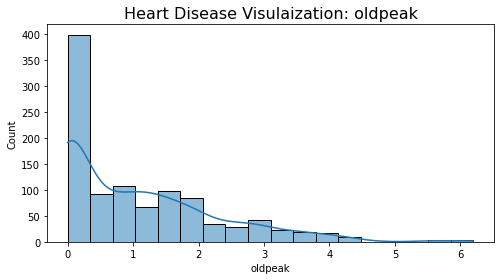

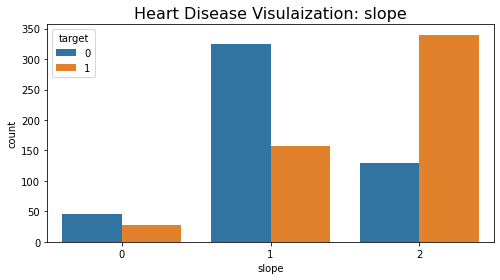

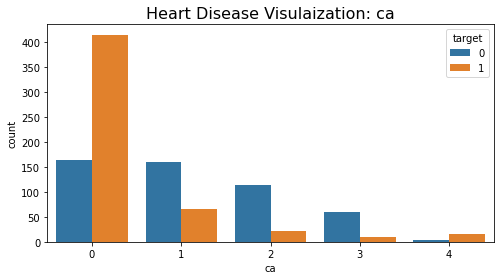

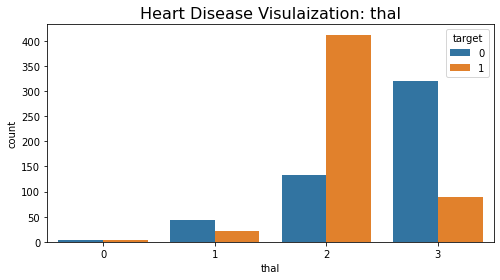

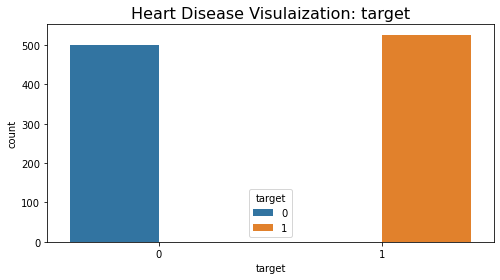

In [19]:
for col in heart_df.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Heart Disease Visulaization: {col}", fontsize = 16)
    if col in categorical_col:
        sns.countplot(x = heart_df[col], hue = heart_df['target'])
    if col in Numerical_col:
        sns.histplot(heart_df[col], kde = True)

In [20]:
#### From the above conclusion we can predict that:::

# AGE: Most of the people ages ranges from 50-60
#SEX: Most of Feamle compares to male have heart disease
#CP: The cp is 2 the heart disease is more and with 1 is leass
#trestbps : Most of the tresbps ranges from120-140
# chol: most of the cholestrol ranges from 200-300
# fbs(fast blood sugar) : with no fbs there prople have heart disease slight more where people with fbs less heart disease
# number of people have heart disese is more compares to no heart disese.

<AxesSubplot:>

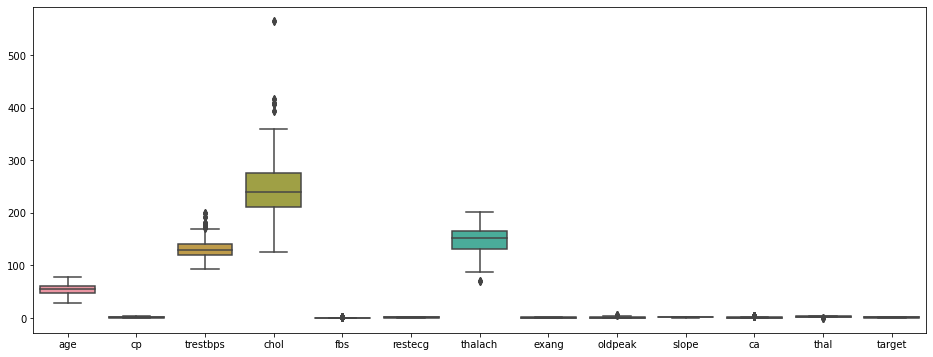

In [21]:
plt.figure(figsize = (16,6))
sns.boxplot(data = heart_df)

<AxesSubplot:ylabel='trestbps'>

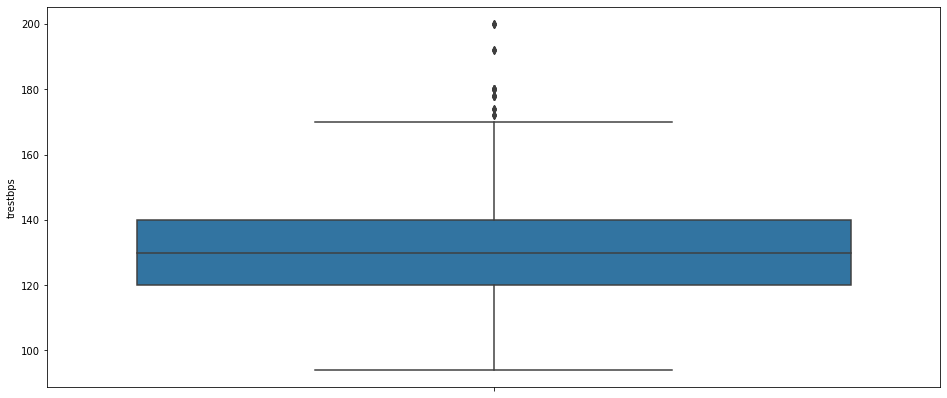

In [22]:
plt.figure(figsize = (16,7))
sns.boxplot(y='trestbps',data = heart_df)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

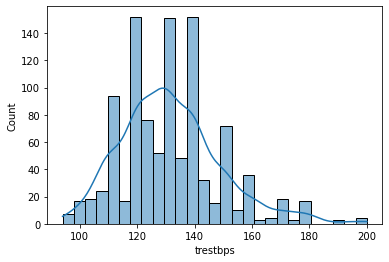

In [23]:
sns.histplot(heart_df['trestbps'],kde=True)  ## almost Normally dist

In [24]:
Outliers=[]
def outliers(values):
    th=3
    mean=np.mean(values)
    std=np.std(values)
    
    for i in values:
        z_score=(i-mean)/std
        if (np.abs(z_score)>th):
            Outliers.append(i)
            
        return Outliers

In [25]:
outliers(heart_df['trestbps'])

[]

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

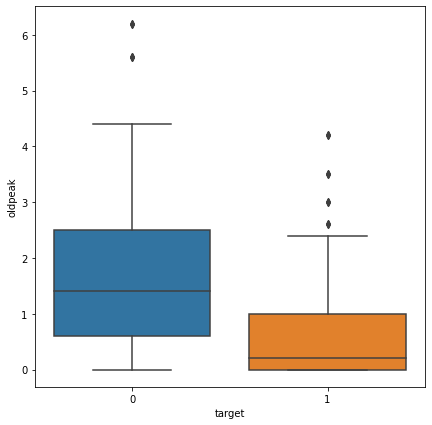

In [26]:
plt.figure(figsize = (7,7))
sns.boxplot(x='target', y='oldpeak', data=heart_df)

In [27]:
heart_df.age.value_counts()[:10]

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
Name: age, dtype: int64

In [28]:
heart_df.age.value_counts()[:10].values

array([68, 57, 53, 46, 43, 39, 39, 37, 37, 36], dtype=int64)

Text(0, 0.5, 'Age distribution')

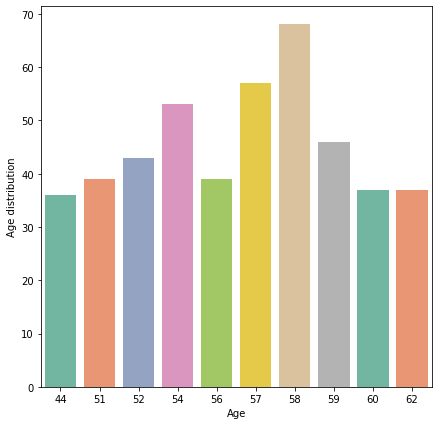

In [29]:
# Analyze distribution in age in range 10
plt.figure(figsize = (7,7))
sns.barplot(x=heart_df.age.value_counts()[:10].index,y=heart_df.age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

<AxesSubplot:ylabel='chol'>

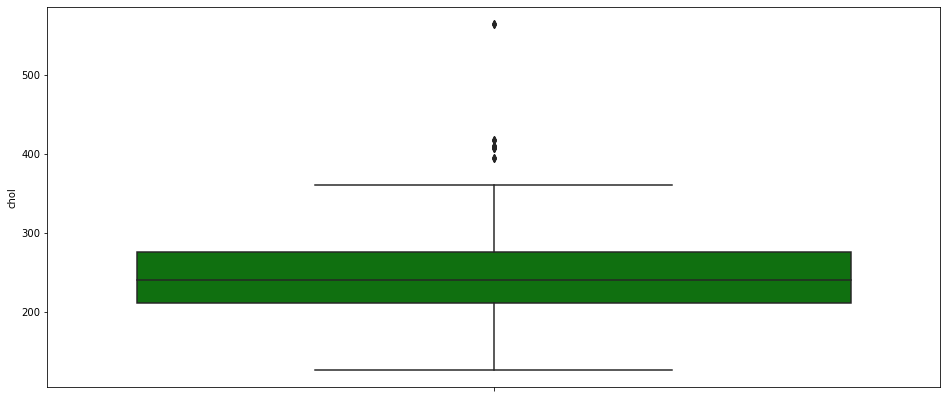

In [30]:
plt.figure(figsize = (16,7))
sns.boxplot(y='chol',data = heart_df,color='green')

<AxesSubplot:ylabel='thalach'>

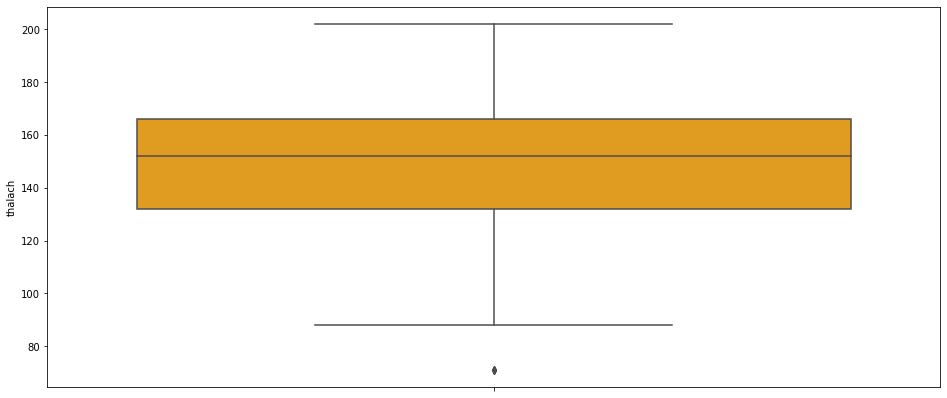

In [31]:
plt.figure(figsize = (16,7))
sns.boxplot(y='thalach',data = heart_df,color='orange')

<AxesSubplot:ylabel='ca'>

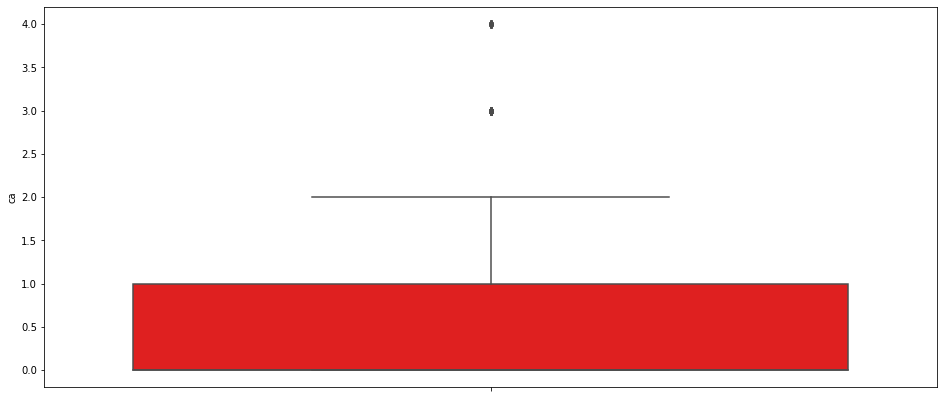

In [32]:
plt.figure(figsize = (16,7))
sns.boxplot(y='ca',data = heart_df,color='red')

<AxesSubplot:ylabel='thal'>

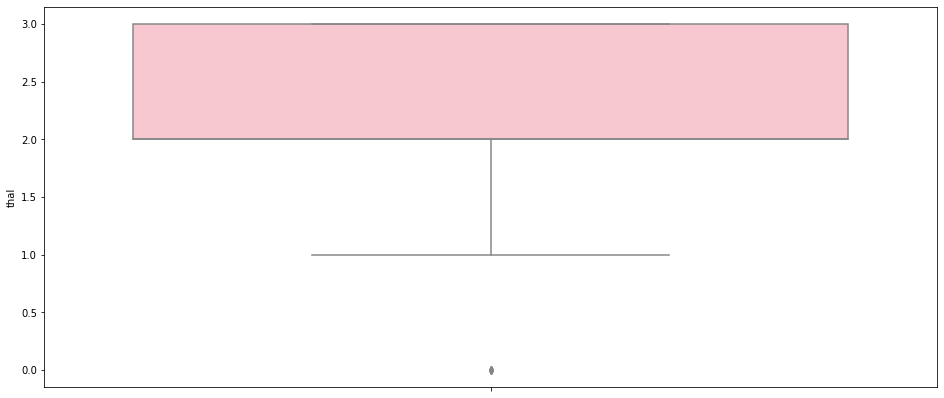

In [33]:
plt.figure(figsize = (16,7))
sns.boxplot(y='thal',data = heart_df,color='pink')

In [34]:
Numerical_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<AxesSubplot:xlabel='age', ylabel='trestbps'>

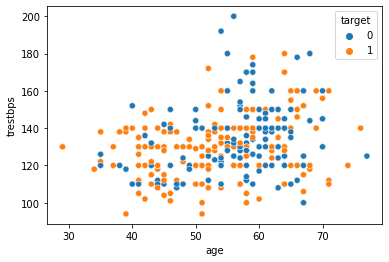

In [35]:
sns.scatterplot(data=heart_df, x='age', y='trestbps',hue='target')

<AxesSubplot:xlabel='chol', ylabel='trestbps'>

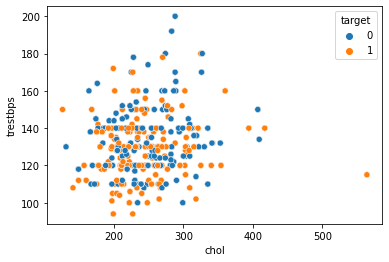

In [36]:
sns.scatterplot(data=heart_df, x='chol', y='trestbps',hue='target')

<AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>

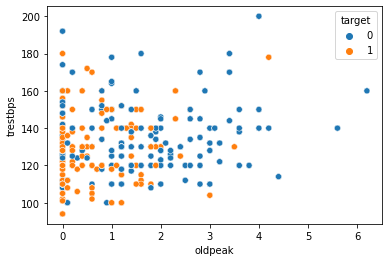

In [37]:
sns.scatterplot(data=heart_df, x= 'oldpeak', y='trestbps',hue='target')

<AxesSubplot:xlabel='oldpeak', ylabel='chol'>

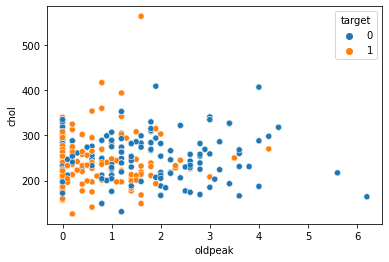

In [38]:
sns.scatterplot(data=heart_df, x= 'oldpeak', y='chol',hue='target')

<AxesSubplot:xlabel='oldpeak', ylabel='age'>

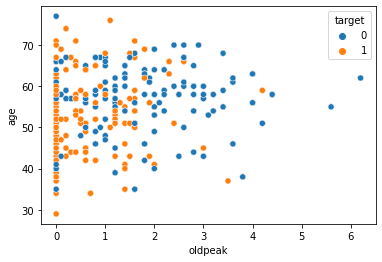

In [39]:
sns.scatterplot(data=heart_df, x= 'oldpeak', y='age',hue='target')

<AxesSubplot:>

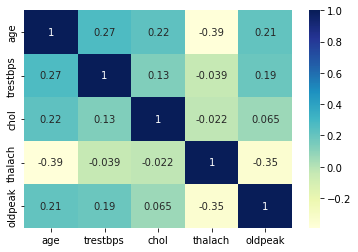

In [40]:
sns.heatmap(heart_df.corr(),cmap="YlGnBu", annot=True)

In [41]:
heart_df=heart_df[(heart_df['trestbps']<170) &(heart_df['chol']<350)&(heart_df['thalach']>75)]

<AxesSubplot:ylabel='chol'>

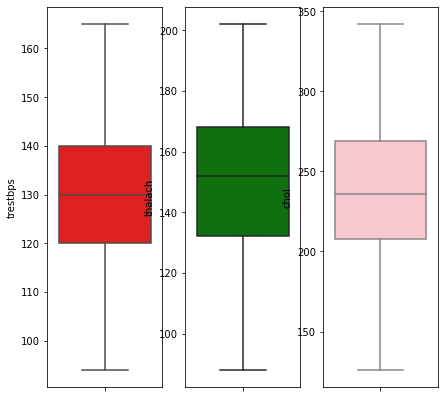

In [42]:
plt.figure(figsize = (7,7))
plt.subplot(1,3,1)
sns.boxplot(y='trestbps',data = heart_df,color='red')

plt.subplot(1,3,2)
sns.boxplot(y='thalach',data = heart_df,color='green')

plt.subplot(1,3,3)
sns.boxplot(y='chol',data = heart_df,color='pink')       

In [43]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       950 non-null    int64  
 1   sex       950 non-null    object 
 2   cp        950 non-null    object 
 3   trestbps  950 non-null    int64  
 4   chol      950 non-null    int64  
 5   fbs       950 non-null    object 
 6   restecg   950 non-null    object 
 7   thalach   950 non-null    int64  
 8   exang     950 non-null    object 
 9   oldpeak   950 non-null    float64
 10  slope     950 non-null    object 
 11  ca        950 non-null    object 
 12  thal      950 non-null    object 
 13  target    950 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 111.3+ KB


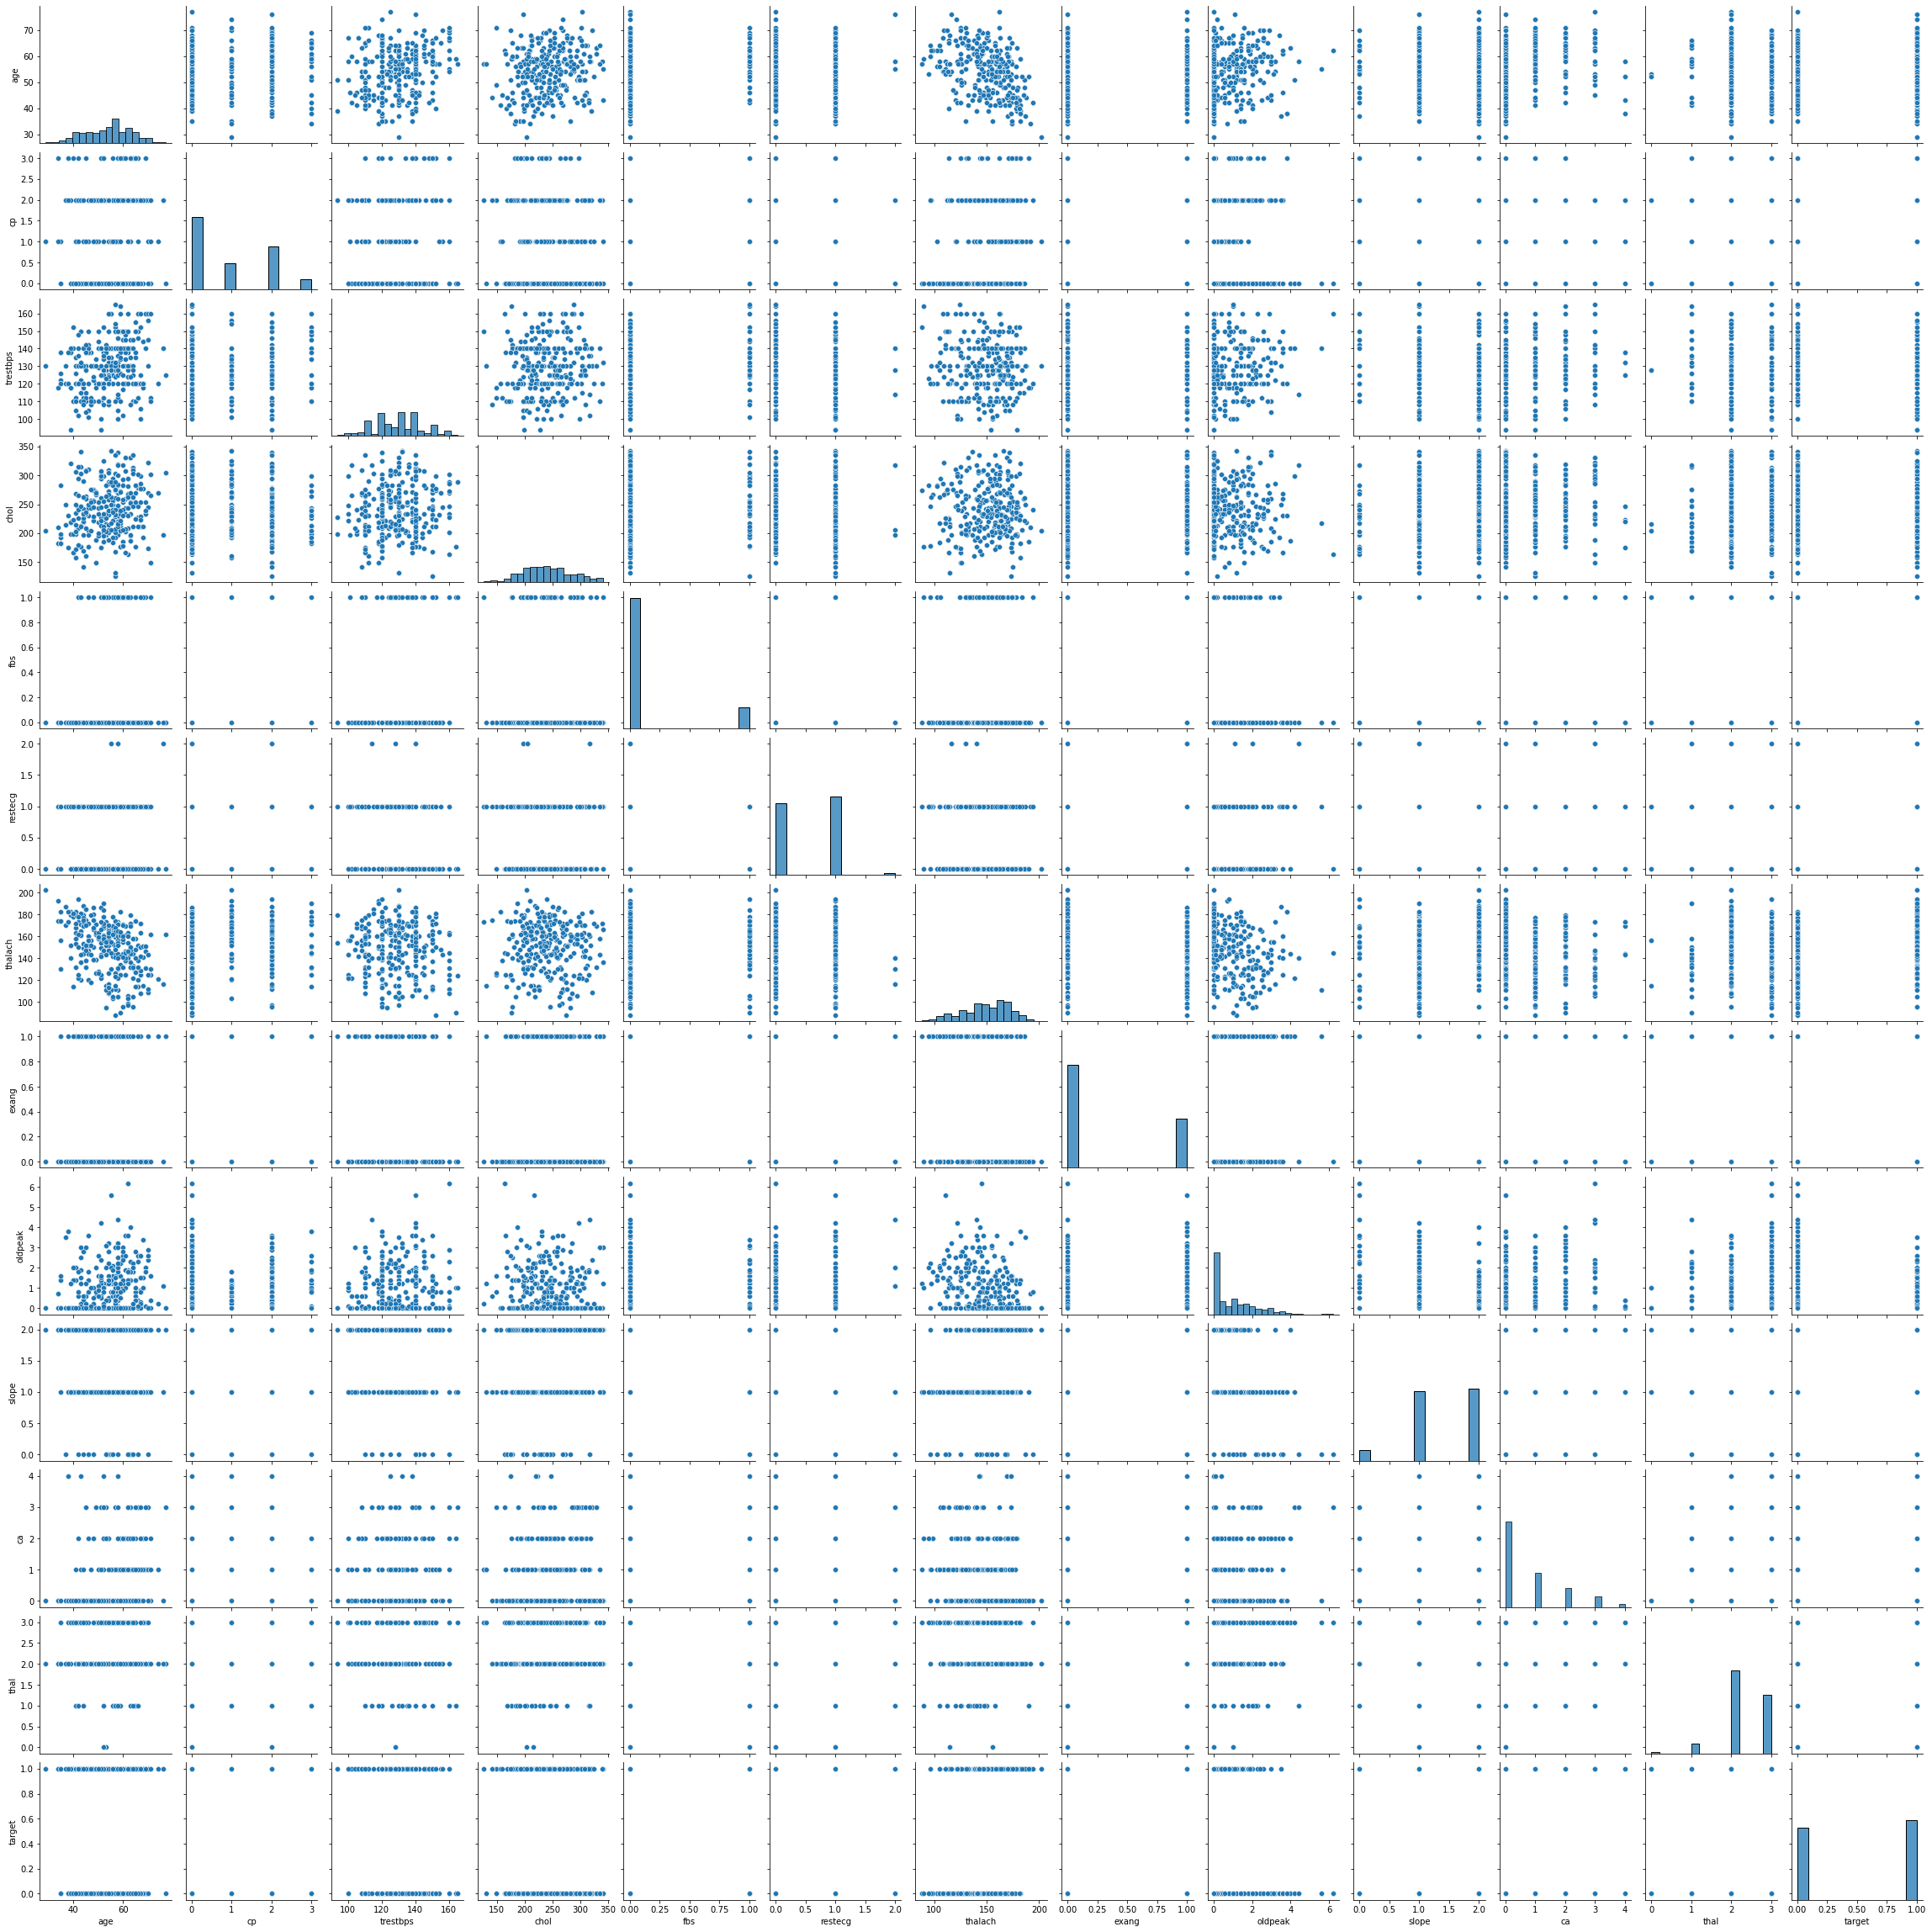

In [44]:
sns.pairplot(heart_df)
plt.show()

In [45]:
heart_df['sex'].replace('Female', 0,inplace=True)
heart_df['sex'].replace('Male',1,inplace=True)

In [46]:
# now we will convert dtype of object into int

categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']
for i in categoricas:
    heart_df[i]= heart_df[i].astype('int64')


In [47]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       950 non-null    int64  
 1   sex       950 non-null    int64  
 2   cp        950 non-null    int64  
 3   trestbps  950 non-null    int64  
 4   chol      950 non-null    int64  
 5   fbs       950 non-null    int64  
 6   restecg   950 non-null    int64  
 7   thalach   950 non-null    int64  
 8   exang     950 non-null    int64  
 9   oldpeak   950 non-null    float64
 10  slope     950 non-null    int64  
 11  ca        950 non-null    int64  
 12  thal      950 non-null    int64  
 13  target    950 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 143.6 KB


In [48]:
## split x and y

In [49]:
x=heart_df.drop('target',axis=1)
y=heart_df.target

In [50]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [53]:
x_train.shape,y_train.shape

((665, 13), (665,))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

#### Logistic Regression

In [55]:
model_log=LogisticRegression()

In [56]:
model_log.fit(x_train,y_train)

C:\Users\Prema\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_log=model_log.predict(x_test)

In [58]:
y_log

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [59]:
accu_log=accuracy_score(y_log,y_test)

In [60]:
accu_log

0.8280701754385965

In [61]:
confusion_matrix(y_test,y_log,)

array([[ 95,  39],
       [ 10, 141]], dtype=int64)

In [62]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)

In [63]:
95/(95+39)

0.7089552238805971

In [64]:
95/(95+10)

0.9047619047619048

In [65]:
precision=precision_score(y_test,y_log)

In [66]:
precision

0.7833333333333333

In [67]:
Recall=recall_score(y_test,y_log)

In [68]:
Recall

0.9337748344370861

In [69]:
#### Desicision Tree

In [70]:
model_des=DecisionTreeClassifier()

In [71]:
model_des.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
type(x_test)

pandas.core.frame.DataFrame

In [73]:
y_des=model_des.predict(x_test)

In [74]:
accu_des=accuracy_score(y_des,y_test)

In [75]:
accu_des

0.9894736842105263

In [76]:
confusion_matrix(y_des,y_test)

array([[131,   0],
       [  3, 151]], dtype=int64)

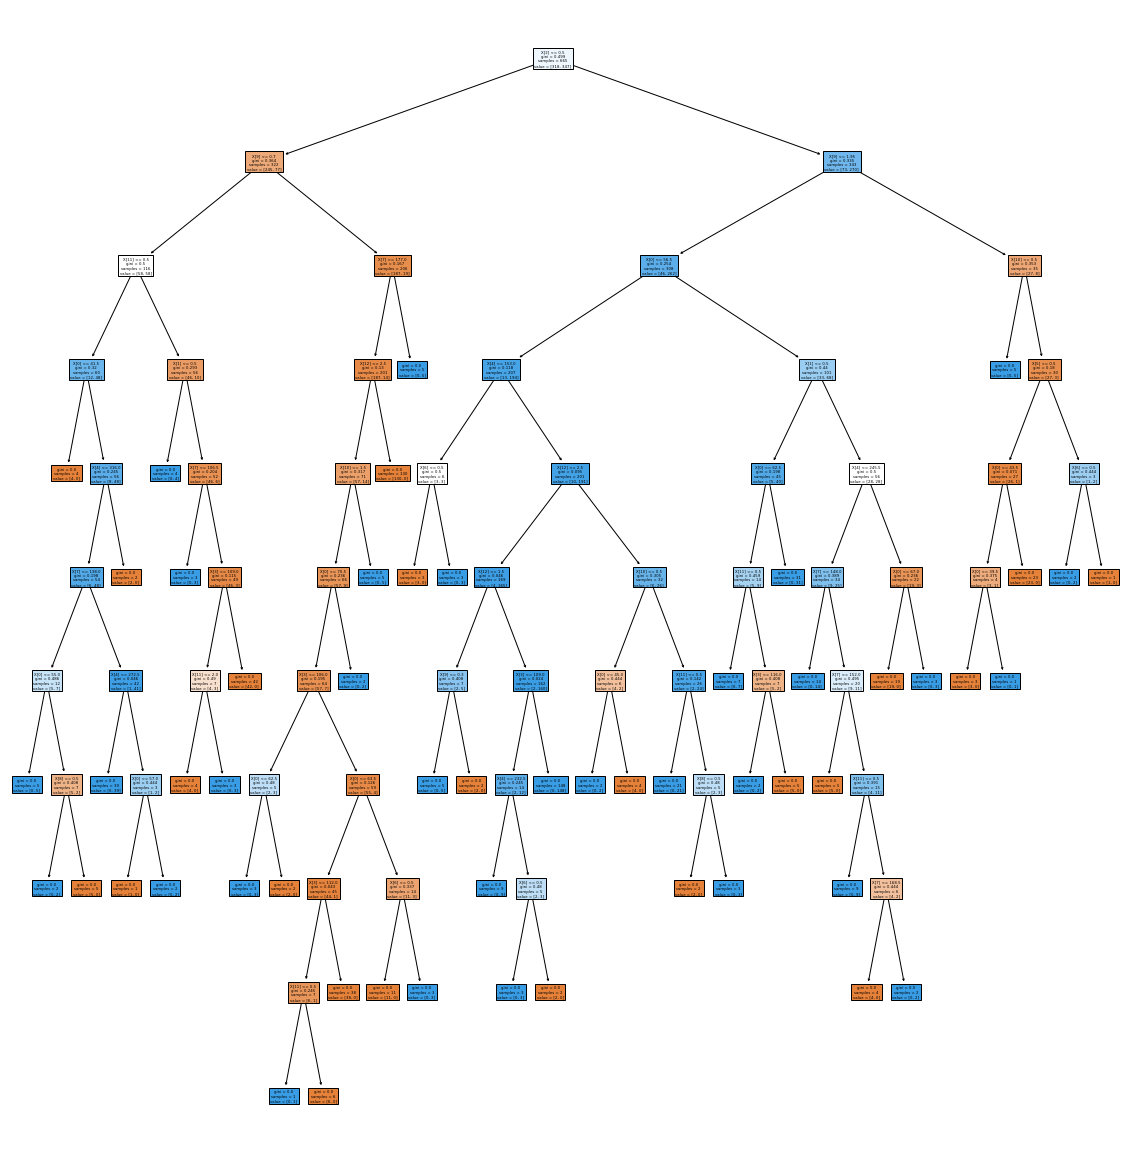

In [77]:
plt.figure(figsize=(20,21))
tree.plot_tree(model_des,filled=True)
plt.show()

In [78]:
precision=precision_score(y_test,y_des)

In [79]:
Recall=recall_score(y_test,y_des)

In [80]:
precision

0.9805194805194806

In [81]:
Recall

1.0

In [82]:
##### Random Forest

In [83]:
model_random=RandomForestClassifier()

In [84]:
model_random.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_random=model_random.predict(x_test)

In [86]:
accu_random=accuracy_score(y_random,y_test)

In [87]:
accu_random

0.9894736842105263

In [88]:
confusion_matrix(y_random,y_test)

array([[131,   0],
       [  3, 151]], dtype=int64)

In [89]:
precision=precision_score(y_test,y_random)

In [90]:
precision

0.9805194805194806

In [91]:
Recall=recall_score(y_test,y_random)

In [92]:
Recall

1.0

In [93]:
### KNN classifier

In [94]:
model_knn= KNeighborsClassifier()

In [95]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
y_knn=model_knn.predict(x_test)

In [97]:
accu_knn=accuracy_score(y_knn,y_test)

In [98]:
accu_knn

0.7614035087719299

In [99]:
confusion_matrix(y_knn,y_test)

array([[ 99,  33],
       [ 35, 118]], dtype=int64)

In [100]:
precision=precision_score(y_test,y_knn)

In [101]:
Recall=recall_score(y_test,y_knn)

In [102]:
precision

0.7712418300653595

In [103]:
Recall

0.7814569536423841

In [104]:
##### Naive bayes

In [105]:
model_nb=GaussianNB()

In [106]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [107]:
y_nb=model_nb.predict(x_test)

In [108]:
accu_nb=accuracy_score(y_nb,y_test)

In [109]:
accu_nb

0.7859649122807018

In [110]:
confusion_matrix(y_nb,y_test)

array([[ 91,  18],
       [ 43, 133]], dtype=int64)

In [111]:
precision=precision_score(y_test,y_nb)

In [112]:
Recall=recall_score(y_test,y_nb)

In [113]:
precision

0.7556818181818182

In [114]:
Recall

0.8807947019867549

In [115]:
##### SVC

In [116]:
model_svc=SVC()

In [117]:
model_svc.fit(x_train,y_train)

SVC()

In [118]:
y_svc=model_svc.predict(x_test)

In [119]:
accu_svc=accuracy_score(y_svc,y_test)

In [120]:
accu_svc

0.7052631578947368

In [121]:
confusion_matrix(y_test,y_svc)

array([[ 78,  56],
       [ 28, 123]], dtype=int64)

In [122]:
precision=precision_score(y_test,y_svc)

In [123]:
Recall=recall_score(y_test,y_svc)

In [124]:
precision

0.6871508379888268

In [125]:
Recall

0.8145695364238411

In [126]:
### Gradiesnt bosstingg

In [127]:
model_boost=GradientBoostingClassifier()

In [128]:
model_boost.fit(x_train,y_train)

GradientBoostingClassifier()

In [129]:
y_boost=model_boost.predict(x_test)

In [130]:
accu_boost=accuracy_score(y_boost,y_test)

In [131]:
accu_boost

0.9719298245614035

In [132]:
confusion_matrix(y_boost,y_test)

array([[129,   3],
       [  5, 148]], dtype=int64)

In [133]:
precision=precision_score(y_test,y_boost)

In [134]:
Recall=recall_score(y_test,y_boost)

In [135]:
precision

0.9673202614379085

In [136]:
Recall

0.9801324503311258

In [137]:
print('accuracy score using logistic Regression : ',accu_log)
print('accuracy score using Knn algorithm : ',accu_knn)
print('accuracy score using naive bay''s algorithm : ',accu_nb)
print('accuracy score using DecisionsTree algorithm : ',accu_des)
print('accuracy score using Support vector machine algorithm : ',accu_svc)
print('accuracy score using Random Forest algorithm : ',accu_random)
print('accuracy score using Gradient boosting classifier : ',accu_boost)
lis=[accu_log,accu_knn,accu_nb,accu_des,accu_svc,accu_random,accu_boost]
lis.sort(reverse=True)

for i in lis:
    print(round(i,2))

accuracy score using logistic Regression :  0.8280701754385965
accuracy score using Knn algorithm :  0.7614035087719299
accuracy score using naive bays algorithm :  0.7859649122807018
accuracy score using DecisionsTree algorithm :  0.9894736842105263
accuracy score using Support vector machine algorithm :  0.7052631578947368
accuracy score using Random Forest algorithm :  0.9894736842105263
accuracy score using Gradient boosting classifier :  0.9719298245614035
0.99
0.99
0.97
0.83
0.79
0.76
0.71


## Random Forest(100%)>Decision Tree(99%)>Gradient Boost(97%)>Logistic Regression(83%)>Bayes Algorith(79%)>Knn(76%)>SVM(71%)

In [138]:
### Application

In [139]:
categorical_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [140]:
Numerical_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [141]:
heart_df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [142]:
# taking features from the user

## Please enter the following values one by one with space in sequence
# sex 1 for male 2 for female

features = list(map(int, input("Enter multiple values: ").split()))
y_features=model_des.predict(np.array(features).reshape(1,-1))
if (y_features)==1:
    print('you have heart disease :( ')
else:
    print('you are safe :)')
    
# taking features from the user
## 0 = normal; 1 = medium range; 2 = high range 3=very high

# Enter your age(age)
# Enter your sex with 1 an0 d 0: 1=,male 0=female(sex)
# Enter chest pain ranges from(0,1,2,3)(cp)
# Enter Resting blood pressure(trestbps)
# Enter serum cholestoral in mg/dl(chol)
# Enter fasting blood sugar > 120 mg/dl(0,1)(fbs)
# Enter resting electrocardiographic results (values 0,1,2)(restecg)
# Eter maximum heart rate achieved(thalach)
# Enter exercise induced angina(0,1)(exang)
# Enter oldpeak (oldpeak)
# Enter the slope of the peak exercise ST segment(0,1,2)(slope)
# Enter number of major vessels[ colored by flourosopy](0-4)(ca)
# Enter thal: (0,1,2,3)(thal)



Enter multiple values: 23 1 2 1 4 1 1 34 0 1 1 3 2
you have heart disease :( 


C:\Users\Prema\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
